In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('final_dataset_phase2.csv')

In [3]:
data

,Pregnancies,Glucose,SkinThickness,Insulin,Age,BMIxThickness,BMIxAge,Outcome
0,0.058824,0.232258,0.043478,0.055288,0.016667,0.053481,0.120010,0
1,0.117647,0.483871,0.217391,0.106370,0.850000,0.108738,0.444531,0
2,0.588235,0.458065,0.271739,0.186899,0.150000,0.266408,0.279419,1
3,0.058824,0.883871,0.380435,0.335337,0.016667,0.427961,0.215051,1
4,0.235294,0.341935,0.173913,0.106370,0.016667,0.141859,0.102903,0
...,...,...,...,...,...,...,...,...
763,0.411765,0.864516,0.271739,0.186899,0.333333,0.316117,0.541602,1
764,0.176471,0.541935,0.217391,0.106370,0.566667,0.119972,0.336228,0
765,0.294118,0.283871,0.250000,0.106370,0.266667,0.191623,0.276050,0
766,0.176471,0.277419,0.119565,0.106370,0.000000,0.070791,0.032659,0


In [7]:
data[data['Outcome'] == 1].describe()

,Pregnancies,Glucose,SkinThickness,Insulin,Age,BMIxThickness,BMIxAge,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,0.286216,0.634208,0.279040,0.208673,0.267786,0.289330,0.395828,1.0
std,0.220073,0.190250,0.092056,0.113118,0.182804,0.127671,0.175484,0.0
min,0.000000,0.219355,0.000000,0.000000,0.000000,0.015534,0.062424,1.0
25%,0.102941,0.483871,0.250000,0.186899,0.116667,0.221123,0.253013,1.0
50%,0.235294,0.619355,0.271739,0.186899,0.250000,0.263759,0.386038,1.0
75%,0.470588,0.793548,0.315217,0.186899,0.383333,0.342746,0.501847,1.0
max,1.000000,1.000000,1.000000,1.000000,0.816667,1.000000,0.949240,1.0


In [8]:
data[data['Outcome'] == 0].describe()

,Pregnancies,Glucose,SkinThickness,Insulin,Age,BMIxThickness,BMIxAge,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.194000,0.429819,0.219239,0.124005,0.169833,0.203207,0.251135,0.0
std,0.177481,0.159380,0.092575,0.090968,0.194461,0.114243,0.176720,0.0
min,0.000000,0.000000,0.000000,0.001202,0.000000,0.000000,0.000000,0.0
25%,0.058824,0.316129,0.163043,0.097356,0.033333,0.125964,0.115582,0.0
50%,0.117647,0.406452,0.217391,0.106370,0.100000,0.185132,0.206584,0.0
75%,0.294118,0.522581,0.260870,0.109375,0.266667,0.255589,0.334521,0.0
max,0.764706,0.987097,0.576087,0.877404,1.000000,0.740860,1.000000,0.0


In [4]:
from sklearn.svm import SVC
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.model_selection import train_test_split
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##Support Vector Machine

In [11]:
svm = SVC()
svm.fit(X_train,Y_train)

svm_acc= accuracy_score(Y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

Train Set Accuracy:83.55048859934854
Test Set Accuracy:78.57142857142857


Now we will optimize the hyperparameters using Grid Search to improve the accuracy scores

In [6]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [7]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [8]:
grid_result = grid_search.fit(X, y)

In [9]:
svm_pred=grid_result.predict(X_test)

In [10]:
print(grid_search.best_params_)

{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [16]:
svm_acc= accuracy_score(Y_test,grid_result.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,grid_result.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,grid_result.predict(X_test))*100))

Train Set Accuracy:91.69381107491856
Test Set Accuracy:93.5064935064935


Classification Report is:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        89
           1       0.97      0.88      0.92        65

    accuracy                           0.94       154
   macro avg       0.94      0.93      0.93       154
weighted avg       0.94      0.94      0.93       154



<AxesSubplot:>

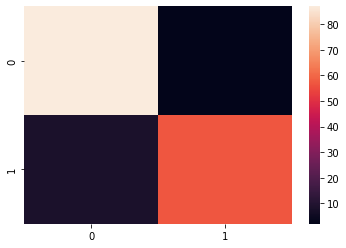

In [17]:
print("Classification Report is:\n",classification_report(Y_test,svm_pred))
sns.heatmap(confusion_matrix(Y_test,svm_pred))

Note that the accuracy scores significantly improved after optimizing the hyperparamters for SVC

In [11]:
import pickle
import os
import sys
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


#For training
def train():
    data= pd.read_csv('final_dataset_phase2.csv')
    X = data[['Pregnancies','Glucose','SkinThickness','Insulin','Age','BMIxThickness','BMIxAge']]
    Y = data[['Outcome']]

    #train test split
    from sklearn.model_selection import train_test_split
    #X = data.drop('Outcome', axis=1)
    #y = data['Outcome']
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

    from sklearn.svm import SVC
    model = SVC()
    kernel = ['poly', 'rbf', 'sigmoid']
    C = [50, 10, 1.0, 0.1, 0.01]
    gamma = ['scale']
    # define grid search
    grid = dict(kernel=kernel,C=C,gamma=gamma)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
    svc = grid_search.fit(X, y)

    #model = SVC(kernel='linear')
    #svc=model.fit(X_train,Y_train)

    #Save Model As Pickle File
    with open('svc.pkl','wb') as m:
        pickle.dump(svc,m)
    test(X_test,Y_test)

#Test accuracy of the model
def test(X_test,Y_test):
    with open('svc.pkl','rb') as mod:
        p=pickle.load(mod)

    pre=p.predict(X_test)
    print (accuracy_score(Y_test,pre)) #Prints the accuracy of the model


def find_data_file(filename):
    if getattr(sys, "frozen", False):
        # The application is frozen.
        datadir = os.path.dirname(sys.executable)
    else:
        # The application is not frozen.
        datadir = os.path.dirname(__file__)

    return os.path.join(datadir, filename)


def check_input(data) -> int:
    df = pd.DataFrame(data=data, index=[0])
    columns = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'Age', 'BMIxThickness', 'BMIxAge']

    scaler = MinMaxScaler()  
    df_normalized = scaler.fit_transform(df[columns])
    with open(find_data_file('svc.pkl'), 'rb') as model:
        p = pickle.load(model)
    op = p.predict(df_normalized)
    return op[0]

if __name__=='__main__':
    train()

0.935064935064935
